# Employee Turnover Analysis Using AI

<img src="https://blogimage.vantagecircle.com/content/images/2024/02/Employee-Turnover.png" alt="AI and Data Analysis" width="100%">

**HumanForYou - Pharmaceutical Industry**  
**March 2025**  

---


## Key Focus Areas  

Data-driven insights into employee attrition  
Predictive modeling using machine learning  
Actionable strategies for workforce stability  

> **Presented by:** Team 2 
> AI & Data Analytics Specialist  



## 1. Project Overview  

HumanForYou, a leading pharmaceutical company in India with 4,000 employees, faces an annual employee turnover rate of 15%. This project leverages AI and data analytics to analyze attrition trends and provide predictive insights to improve retention.  


# 2. Business Problem

The high turnover rate negatively impacts the company in the following ways:

- **Project Delays**: Departing employees cause disruptions in ongoing projects, leading to delays and affecting the company’s reputation.
- **Increased HR Costs**: A substantial HR team is required to continuously recruit and train new employees.
- **Productivity Loss**: New employees require training and adaptation time before becoming fully operational.

To address these challenges, the company has enlisted a data analytics team to analyze key factors influencing employee attrition and recommend strategies to improve retention.


# 3. Data provided by the Human Resources department

## 3.1 Data Human Resources department information regarding each employee

- **Age**: The employee’s age in 2015.
- **Attrition**: The subject of our study - did the employee leave the company during 2016?
- **BusinessTravel**: How often did the employee have to travel as part of their job in 2015?  
  (Non-Travel = never, Travel_Rarely = rarely, Travel_Frequently = frequently)
- **Department**:
- **DistanceFromHome**: Distance in km between the employee’s home and the company.
- **Education**: Education level:  
  1 = Before College (Bac level equivalent)  
  2 = College (Bac+2 equivalent)  
  3 = Bachelor (Bac+3)  
  4 = Master (Bac+5)  
  5 = PhD (Doctoral thesis)
- **EducationField**: Study field, main subject.
- **EmployeeCount**: Boolean set to 1 if the employee was counted in the workforce in 2015.
- **EmployeeId**: Employee identifier.
- **Gender**: Employee’s gender.
- **JobLevel**: Hierarchical level in the company from 1 to 5.
- **JobRole**: Job role in the company.
- **MaritalStatus**: Marital status of the employee (Single, Married, or Divorced).
- **MonthlyIncome**: Gross wage per month, in rupees.
- **NumCompaniesWorked**: Number of companies the employee has worked for before joining HumanForYou.
- **Over18**: Is the employee over 18 years old or not?
- **PercentSalaryHike**: Salary increase % in 2015.
- **StandardHours**: Number of working hours per day in the employee’s contract.
- **StockOptionLevel**: Level of investment in company shares by the employee.
- **TotalWorkingYears**: Number of years the employee has worked for the company in the same type of position.
- **TrainingTimesLastYear**: Number of training days in 2015.
- **YearsAtCompany**: Seniority in the company.
- **YearsSinceLastPromotion**: Number of years since the last individual salary raise.
- **YearsWithCurrentManager**: Number of years the employee has worked under their current manager’s responsibility.


## 3.2 Data Last assessment provided by the manager

- **EmployeeID**: Employee identifier.
- **JobInvolvement**: An assessment of the employee’s involvement in their job, graded:  
  1 = Poor  
  2 = Average  
  3 = Significant  
  4 = Very significant
- **PerformanceRating**: An assessment of the employee’s annual performance level for the company, graded:  
  1 = Poor  
  2 = Good  
  3 = Excellent  
  4 = Beyond expectations


## 3.3 Data Survey on the quality of life at work

- **EnvironmentSatisfaction**: The work environment, graded:  
  1 = Low  
  2 = Medium  
  3 = High  
  4 = Very high
- **JobSatisfaction**: Satisfaction with their job, graded from 1 to 4 as above.
- **WorkLifeBalance**: Their work/private life balance, graded:  
  1 = Bad  
  2 = Satisfactory  
  3 = Very satisfactory  
  4 = Excellent


## 3.4 Data Working hours

In data Working Hours we have two documents. The columns represent the days working in the year 2015, and the rows the id employees.

- The **first** one contains the days with the hours that the employee arrived work.

- The **second** contains the days with the hours that the employee left work.

in_time_data
out_time_data

# 4 Data preparation

### Library installation and importation

In [1]:
#Library instalattion

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn


In [2]:
#Library importation

import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from functools import reduce
import seaborn as sns


## Retriving all the dataset

In [3]:
general_data = pd.read_csv('data/general_data.csv')

#Last assessment provided by the manager
manager_survey_data = pd.read_csv('data/manager_survey_data.csv')

#Survey on the quality of life at work
employee_survey_data = pd.read_csv('data/employee_survey_data.csv')

#Working hours
out_time_data = pd.read_csv('data/out_time.csv')
in_time_data = pd.read_csv('data/in_time.csv')


In [4]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


> [!NOTE]  
> We will note take acount about the out and in time

### Cleaning data for porpose analysis

In [6]:
cleaned_general_data = general_data.dropna()

#Last assessment provided by the manager
cleaned_manager_survey_data = manager_survey_data.dropna()

#Survey on the quality of life at work
cleaned_employee_survey_data = employee_survey_data.dropna()


In [7]:
print(f"general_data loss",general_data.shape[0] - cleaned_general_data.shape[0],"row", round((general_data.shape[0] - cleaned_general_data.shape[0])/general_data.shape[0],4)*100,"%")
print(f"manager_survey_data loss",manager_survey_data.shape[0] - cleaned_manager_survey_data.shape[0],"row", round((manager_survey_data.shape[0] - cleaned_manager_survey_data.shape[0])/manager_survey_data.shape[0],4)*100,"%")
print(f"employee_survey_data loss",employee_survey_data.shape[0] - cleaned_employee_survey_data.shape[0],"row", round((employee_survey_data.shape[0] - cleaned_employee_survey_data.shape[0])/employee_survey_data.shape[0],5)*100,"%")

general_data loss 28 row 0.63 %
manager_survey_data loss 0 row 0.0 %
employee_survey_data loss 83 row 1.882 %


## Data that don't need to be taken acount :

In [8]:
for col in general_data.columns:
    if general_data[col].nunique() == 1:  # Check if the column has only one unique value
        print(f"Column '{col}' has only one unique value: {general_data[col].unique()[0]}")

for col in manager_survey_data.columns:
    if manager_survey_data[col].nunique() == 1:  # Check if the column has only one unique value
        print(f"Column '{col}' has only one unique value: {manager_survey_data[col].unique()[0]}")

for col in employee_survey_data.columns:
    if employee_survey_data[col].nunique() == 1:  # Check if the column has only one unique value
        print(f"Column '{col}' has only one unique value: {employee_survey_data[col].unique()[0]}")

Column 'EmployeeCount' has only one unique value: 1
Column 'Over18' has only one unique value: Y
Column 'StandardHours' has only one unique value: 8


### For Optimization and Relevant Data

- **EmployeeCount**: This column has only one unique value (`1`), meaning it doesn’t provide any useful variation. Since it is constant for all employees, it can be removed to optimize the dataset.  
- **Over18**: Since all employees are over 18 years old (`Yes` for everyone), this column does not provide any distinguishing information. Removing it helps avoid redundant data.  
- **StandardHours**: The standard working hours for all employees in their contracts are fixed at **8 hours**. Since there is no variation, this column does not contribute to any meaningful analysis and can be dropped for efficiency.  

### For Ethical Issues

- **Gender**: Including gender in the analysis could introduce **bias in decision-making**. Since an employee’s gender does not determine their performance, attrition, or job satisfaction, it is best to remove this column to ensure **fairness and avoid discrimination**.  
- **MaritalStatus**: Personal information such as marital status should not influence professional evaluations. Keeping this data could lead to **biased assumptions** about employees' work-life balance, commitment, or performance. Removing it promotes **equal treatment** of all employees, regardless of their personal situation.  

In [9]:
columns_to_drop = ["EmployeeCount", "Over18", "StandardHours", "Gender", "MaritalStatus"]

existing_columns = [col for col in columns_to_drop if col in general_data.columns]

if existing_columns:
    general_data = general_data.drop(columns=existing_columns)
    print(f"Dropped columns: {existing_columns}")
else:
    print(f"No columns were dropped. They were not found or already deleted")


Dropped columns: ['EmployeeCount', 'Over18', 'StandardHours', 'Gender', 'MaritalStatus']


## Managing the encoding of features

## Justification for Encoding Choice

In order to preprocess categorical variables for machine learning models, we need to decide between **Ordinal Encoding** and **One-Hot Encoding** based on the nature of the data.


In [10]:
import pandas as pd


print("\nColumns with dtype 'object' (categorical/text features):")
data_set = [general_data,manager_survey_data,employee_survey_data]
total_object_columns = []
for data in data_set:
    # Identify columns with dtype 'object'
    object_columns = data.select_dtypes(include=['object']).columns.tolist()
    if object_columns:
        total_object_columns +=object_columns
print(total_object_columns)



Columns with dtype 'object' (categorical/text features):
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole']


In [11]:
object_columns = general_data.select_dtypes(include=['object']).columns.tolist()
for col in object_columns:
    unique_values = general_data[col].unique()  # Get unique values
    print(f"\nColumn '{col}' has {len(unique_values)} unique values:")
    print(unique_values)

object_columns = manager_survey_data.select_dtypes(include=['object']).columns.tolist()
for col in object_columns:
    unique_values = general_data[col].unique()  # Get unique values
    print(f"\nColumn '{col}' has {len(unique_values)} unique values:")
    print(unique_values)

object_columns = employee_survey_data.select_dtypes(include=['object']).columns.tolist()
for col in object_columns:
    unique_values = general_data[col].unique()  # Get unique values
    print(f"\nColumn '{col}' has {len(unique_values)} unique values:")
    print(unique_values)


Column 'Attrition' has 2 unique values:
['No' 'Yes']

Column 'BusinessTravel' has 3 unique values:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Column 'Department' has 3 unique values:
['Sales' 'Research & Development' 'Human Resources']

Column 'EducationField' has 6 unique values:
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Column 'JobRole' has 9 unique values:
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']


### 1. **OrdinalEncoder for Ordered Categories**
The `OrdinalEncoder` assigns numerical values to categories that have a meaningful order. In our dataset:

- **Attrition (`No`, `Yes`)**  
  - This is a binary categorical variable where "No" (0) and "Yes" (1) can be naturally mapped to numerical values.  
  - There is an inherent order since **employees who left (Yes) can be seen as a different state from those who stayed (No)**.

- **BusinessTravel (`Non-Travel`, `Travel_Rarely`, `Travel_Frequently`)**  
  - These categories have a natural ranking:  
    1. **Non-Travel** (least travel)  
    2. **Travel_Rarely** (moderate travel)  
    3. **Travel_Frequently** (most travel)  
  - Using `OrdinalEncoder` ensures that the model can interpret increasing values as an **increase in travel frequency**, which could be useful for predicting trends.

### 2. **OneHotEncoder for Unordered Categories**
The `OneHotEncoder` is suitable for categorical variables that **do not have a meaningful order**. These include:

- **Department (`Sales`, `Research & Development`, `Human Resources`)**  
  - There is no ranking among departments; they are just different groups.

- **EducationField (`Life Sciences`, `Other`, `Medical`, `Marketing`, `Technical Degree`, `Human Resources`)**  
  - No field is inherently "higher" or "lower" than the others.

- **JobRole (`Healthcare Representative`, `Research Scientist`, `Sales Executive`, etc.)**  
  - Job roles represent distinct categories without a natural order.

Using **OneHotEncoder** for these variables ensures that no numerical ranking is mistakenly assigned, which could otherwise bias the model.

### **Conclusion**
- **OrdinalEncoder** is used for `Attrition` and `BusinessTravel` because they have an inherent order.  
- **OneHotEncoder** is used for `Department`, `EducationField`, and `JobRole` to avoid introducing artificial numerical relationships.

This encoding choice ensures that the model properly interprets categorical features without introducing unintended biases.


In [12]:
# Create a copy to preserve the original data
general_data_encoded = general_data.copy()

In [13]:
### Encoding (For Ordered Categories)
ordinal_mappings = {
    "Attrition": [["No", "Yes"]],
    "BusinessTravel": [["Non-Travel", "Travel_Rarely", "Travel_Frequently"]]
}

# Apply Ordinal Encoding
for col, categories in ordinal_mappings.items():
    encoder = OrdinalEncoder(categories=categories)
    general_data_encoded[col] = encoder.fit_transform(general_data_encoded[[col]])


In [14]:
### OneHot Encoding (For Categorical Variables)
categorical_columns = ["Department", "EducationField", "JobRole"]

onehot_encoder = OneHotEncoder(sparse_output=False, drop="first")  # drop='first' avoids collinearity

# Fit and transform categorical columns
encoded_array = onehot_encoder.fit_transform(general_data_encoded[categorical_columns])

# Convert encoded array into a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Merge with the original dataset (Dropping old categorical columns)
general_data_encoded = pd.concat([general_data_encoded.drop(columns=categorical_columns), encoded_df], axis=1)


In [15]:
general_data_encoded

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,51,0.0,1.0,6,2,1,1,131160,1.0,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31,1.0,2.0,10,1,2,1,41890,0.0,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,32,0.0,2.0,17,4,3,4,193280,1.0,15,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,38,0.0,0.0,2,5,4,3,83210,3.0,11,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0.0,1.0,10,1,5,1,23420,4.0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0.0,1.0,5,4,4406,1,60290,3.0,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4406,29,0.0,1.0,2,4,4407,1,26790,2.0,15,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4407,25,0.0,1.0,25,2,4408,2,37020,0.0,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4408,42,0.0,1.0,18,2,4409,1,23980,0.0,14,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Handling Missing Data

In our analysis, the first step we take is to **check for missing data** in the dataset. We use methods like `isnull()` or `isna()` to identify the columns with missing values and assess the extent of the missing data. After detecting the missing values, we move on to deciding the most appropriate method for handling them.

To replace missing data, we  consider three approaches: **mean imputation**, **median imputation**, and **regression imputation**. 

1. **Mean or Median Imputation**: For numerical columns, we replace missing values with the **mean** or **median** of the column. We choose **mean imputation** when the data is relatively symmetrically distributed. However, when the data is skewed or contains outliers, we opt for **median imputation** because the median is less sensitive to extreme values.

2. **Regression Imputation**: For more complex situations where the missing data may depend on other variables, we use **regression imputation**. This method allows us to predict the missing values using relationships between other features in the dataset, offering a potentially more accurate solution.

We make the decision on which method to apply based on a detailed **analysis of each column** with missing data. By carefully evaluating the nature of the data and the relationships between columns, we select the most appropriate strategy for each case. This approach ensures that our dataset remains reliable and suitable for further analysis or model building.

### Missing Data Analysis

In [16]:
#In general_data
print("missing data in general_data")
print(general_data.isna().sum())  # Shows the count of NaNs in each column

missing data in general_data
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
JobLevel                    0
JobRole                     0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [17]:
#In employee_survey_data
print("missing data in employee_survey_data")
print(employee_survey_data.isna().sum())  # Shows the count of NaNs in each column

missing data in employee_survey_data
EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64


In [18]:
#In manager_survey_data
print("missing data in manager_survey_data")
print(manager_survey_data.isna().sum())  # Shows the count of NaNs in each column

missing data in manager_survey_data
EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64




Upon analyzing the `general_data` dataset, we found that there is missing data in the **NumCompaniesWorked** (19 missing) and **TotalWorkingYears** (9 missing) columns.

In the `employee_survey_data` dataset, we discovered missing data in the following columns: **EnvironmentSatisfaction** (25 missing), **JobSatisfaction** (20 missing).


#### General data missing value solution:

#### Handling Missing Data in `NumCompaniesWorked`

Correlation matrix of 'NumCompaniesWorked' with other columns:
NumCompaniesWorked         1.000000
Age                        0.299243
TotalWorkingYears          0.238807
PercentSalaryHike          0.030860
StockOptionLevel           0.017163
EmployeeID                -0.001117
JobLevel                  -0.009875
DistanceFromHome          -0.013843
Education                 -0.016250
MonthlyIncome             -0.020726
TrainingTimesLastYear     -0.032286
YearsSinceLastPromotion   -0.036656
YearsWithCurrManager      -0.109667
YearsAtCompany            -0.117959
Name: NumCompaniesWorked, dtype: float64

Statistics for 'NumCompaniesWorked':
Possible values for 'NumCompaniesWorked': [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. nan]
Number of unique values for 'NumCompaniesWorked': 11
Mean of 'NumCompaniesWorked': 2.69
Median of 'NumCompaniesWorked': 2.0
Variance of 'NumCompaniesWorked': 6.24
Min value of 'NumCompaniesWorked': 0.0
Max value of 'NumCompaniesWorked': 9.0


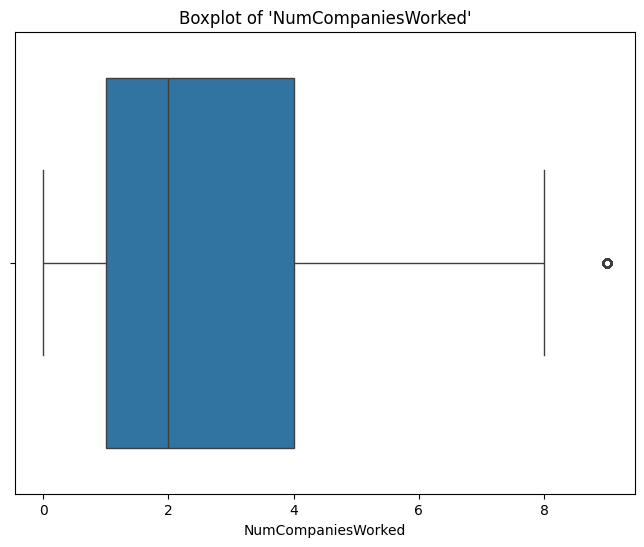

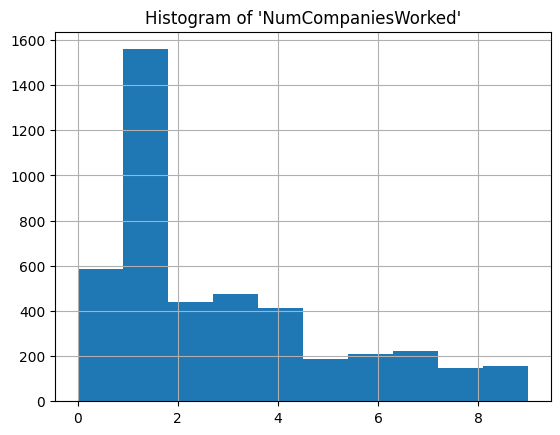

In [19]:
# Define the column name as a variable
column_name = 'NumCompaniesWorked'

# Correlation analysis with other numeric columns
print(f"Correlation matrix of '{column_name}' with other columns:")
corr_matrix = general_data.corr(numeric_only=True)  # Calculate the correlation matrix for numeric columns only
column_corr = corr_matrix[column_name].sort_values(ascending=False)  # Sort by correlation value
print(column_corr)  # Display the correlation values for the selected column

# Displaying basic statistics for the column
print(f"\nStatistics for '{column_name}':")
print(f"Possible values for '{column_name}':", np.sort(general_data[column_name].unique()))
print(f"Number of unique values for '{column_name}':", len(general_data[column_name].unique()))
print(f"Mean of '{column_name}':", round(general_data[column_name].mean(), 2))
print(f"Median of '{column_name}':", general_data[column_name].median())
print(f"Variance of '{column_name}':", round(general_data[column_name].var(), 2))
print(f"Min value of '{column_name}':", general_data[column_name].min())
print(f"Max value of '{column_name}':", general_data[column_name].max())

# Visualizing the distribution with a boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=general_data[column_name])
plt.title(f"Boxplot of '{column_name}'")
plt.show()

general_data[column_name].hist()
plt.title(f"Histogram of '{column_name}'")
plt.show()


In the analysis of the `NumCompaniesWorked` column, we observed a **moderate correlation of 0.29** with other features as we know and as we have taken in consideration **Regression imputation** is more suitable when the correlation is higher than **0.5** (or lower than **-0.5**), but here it was not in this case.

The **mean** is **3** and the **median** is **2**, with a **variance** of **6.24**, indicating that the data is slightly skewed. The possible values for `NumCompaniesWorked` range from **0** to **9**, by that the distribution is not perfectly symmetric, which suggests that **mean imputation** might distort the data, especially with outliers like **7**, **8**, and **9**.

After considering these factors, we decided that **median imputation** would be the most appropriate method. The **median value of 2** represents the central tendency of the data better, without being influenced by extreme values. Therefore, we chose to impute the missing values in `NumCompaniesWorked` with the **median**.


Use KNN for a better handling of missing values

#### Handling Missing Data in `TotalWorkingYears`

Correlation matrix of 'TotalWorkingYears' with other columns:
TotalWorkingYears          1.000000
Age                        0.680661
YearsAtCompany             0.627703
YearsWithCurrManager       0.458800
YearsSinceLastPromotion    0.404444
NumCompaniesWorked         0.238807
DistanceFromHome           0.009374
StockOptionLevel           0.002694
EmployeeID                -0.001063
Education                 -0.010717
PercentSalaryHike         -0.018736
MonthlyIncome             -0.033787
JobLevel                  -0.036957
TrainingTimesLastYear     -0.040762
Name: TotalWorkingYears, dtype: float64

Statistics for 'TotalWorkingYears':
Possible values for 'TotalWorkingYears': [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 40. nan]
Number of unique values for 'TotalWorkingYears': 41
Mean of 'TotalWorkingYears': 11.28
Median of 'TotalWorkingYears': 10.0
Variance of 'TotalWorking

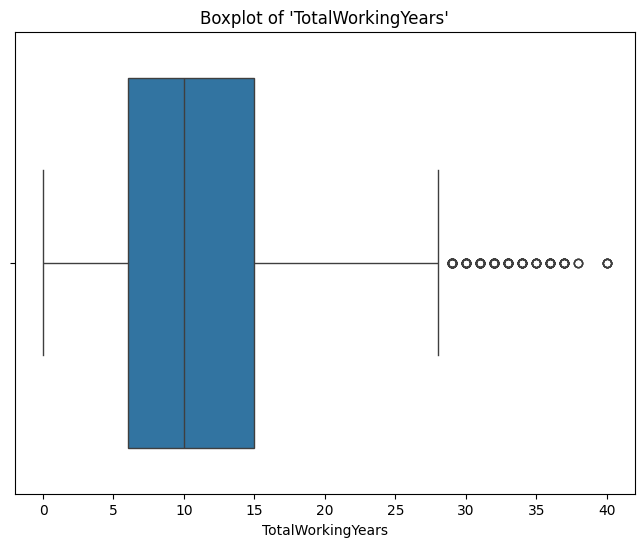

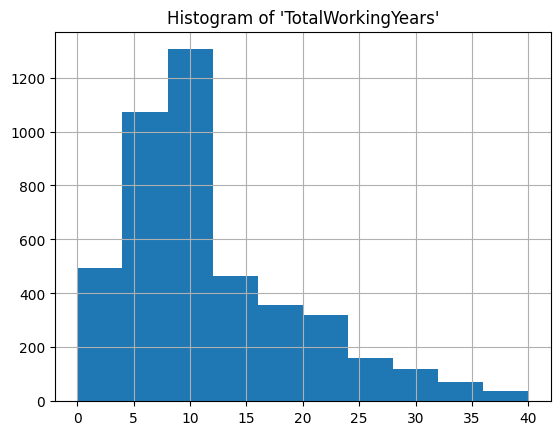

In [ ]:
# Define the column name as a variable
column_name = 'TotalWorkingYears'

# Correlation analysis with other numeric columns
print(f"Correlation matrix of '{column_name}' with other columns:")
corr_matrix = general_data.corr(numeric_only=True)  # Calculate the correlation matrix for numeric columns only
column_corr = corr_matrix[column_name].sort_values(ascending=False)  # Sort by correlation value
print(column_corr)  # Display the correlation values for the selected column

# Displaying basic statistics for the column
print(f"\nStatistics for '{column_name}':")
print(f"Possible values for '{column_name}':", np.sort(general_data[column_name].unique()))
print(f"Number of unique values for '{column_name}':", len(general_data[column_name].unique()))
print(f"Mean of '{column_name}':", round(general_data[column_name].mean(), 2))
print(f"Median of '{column_name}':", general_data[column_name].median())
print(f"Variance of '{column_name}':", round(general_data[column_name].var(), 2))
print(f"Min value of '{column_name}':", general_data[column_name].min())
print(f"Max value of '{column_name}':", general_data[column_name].max())

# Visualizing the distribution with a boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=general_data[column_name])
plt.title(f"Boxplot of '{column_name}'")
plt.show()

general_data[column_name].hist()
plt.title(f"Histogram of '{column_name}'")
plt.show()


We analyzed the **correlation matrix** for the column `TotalWorkingYears` and found a **strong positive relationship** with the `Age` feature, with a correlation coefficient of **0.68**, which is above the threshold of **0.5**, indicating a significant association between these two variables.

Given this strong correlation, we decided to use the **`Age`** column to help **impute missing values** in the `TotalWorkingYears` column. Instead of relying on traditional statistical measures like the **mean** or **median**, we utilized the **correlation** between `Age` and `TotalWorkingYears` to **estimate** and fill in the missing data.

This method is more suitable as it takes into account the inherent **relationship** between the two variables, leading to a more **accurate** and **contextually relevant imputation** for the missing values.


#### Employee survey data missing value solution:

In the case of the `employee_survey_data` dataset, we observed missing values in the following columns related to employee satisfaction: **EnvironmentSatisfaction** (25 missing), **JobSatisfaction** (20 missing), and **WorkLifeBalance** (38 missing). Given that these columns reflect personal opinions and perceptions about the work environment, it is essential to maintain the integrity of the data. 

As such, we decided to **remove all rows with missing values** in these columns. The reasoning behind this decision is that we cannot ethically or accurately infer the satisfaction or opinions of employees without their input. Attempting to create an opinion or argument where data is missing would compromise the quality and validity of the analysis. Therefore, to preserve the authenticity and reliability of the dataset, we opted to remove these rows rather than impute the missing values.


In the `general_data` dataset, we discovered missing data in the following columns: 

- **NumCompaniesWorked** replaced with median
- **TotalWorkingYears** replaced with regression

In the `employee_survey_data` dataset, we discovered missing data in the following columns: 
- **EnvironmentSatisfaction** missing data removed
- **JobSatisfaction** missing data removed

In [21]:
general_data_encoded['NumCompaniesWorked']= general_data_encoded['NumCompaniesWorked'].fillna(general_data_encoded['NumCompaniesWorked'].median())
general_data_encoded['NumCompaniesWorked'] 

0       1.0
1       0.0
2       1.0
3       3.0
4       4.0
       ... 
4405    3.0
4406    2.0
4407    0.0
4408    0.0
4409    0.0
Name: NumCompaniesWorked, Length: 4410, dtype: float64

In [22]:
#In general_data
print("missing data in general_data")
print(general_data_encoded.isna().sum())  # Shows the count of NaNs in each column

missing data in general_data
Age                                  0
Attrition                            0
BusinessTravel                       0
DistanceFromHome                     0
Education                            0
EmployeeID                           0
JobLevel                             0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
StockOptionLevel                     0
TotalWorkingYears                    9
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
Department_Research & Development    0
Department_Sales                     0
EducationField_Life Sciences         0
EducationField_Marketing             0
EducationField_Medical               0
EducationField_Other                 0
EducationField_Technical Degree      0
JobRole_Human Resources              0
JobRole_Laboratory Technician      

In [23]:
# general_data_encoded['NumCompaniesWorked']= general_data_encoded['NumCompaniesWorked'].fillna(general_data_encoded['NumCompaniesWorked'].median())
# general_data_encoded['NumCompaniesWorked'] 

In [24]:
general_data_encoded 

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,51,0.0,1.0,6,2,1,1,131160,1.0,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31,1.0,2.0,10,1,2,1,41890,0.0,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,32,0.0,2.0,17,4,3,4,193280,1.0,15,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,38,0.0,0.0,2,5,4,3,83210,3.0,11,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0.0,1.0,10,1,5,1,23420,4.0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0.0,1.0,5,4,4406,1,60290,3.0,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4406,29,0.0,1.0,2,4,4407,1,26790,2.0,15,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4407,25,0.0,1.0,25,2,4408,2,37020,0.0,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4408,42,0.0,1.0,18,2,4409,1,23980,0.0,14,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'general_data_encoded' is the dataframe and 'TotalWorkingYears' is the target variable

# Select features for multiple regression (X) and target variable (y)
X = cleaned_general_data[['Age', 'YearsAtCompany','YearsWithCurrManager']]  # Include multiple features
y = cleaned_general_data['TotalWorkingYears']

# Drop rows with missing values or impute if necessary
# X = X.dropna()  # Drop rows with missing values in features
# y = y[X.index]  # Align y with X after dropping rows

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Calculate the performance (e.g., mean squared error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# If you want to fill missing values in the 'TotalWorkingYears' column
# missing_data = general_data_encoded[general_data_encoded['TotalWorkingYears'].isna()]
# predicted_values = lin_reg.predict(missing_data[['Age', 'NumCompaniesWorked', 'YearsAtCompany']])
# general_data_encoded.loc[general_data_encoded['TotalWorkingYears'].isna(), 'TotalWorkingYears'] = predicted_values


Mean Squared Error: 22.00913992418875


Mean Squared Error (non-missing data): 9.911211806296093


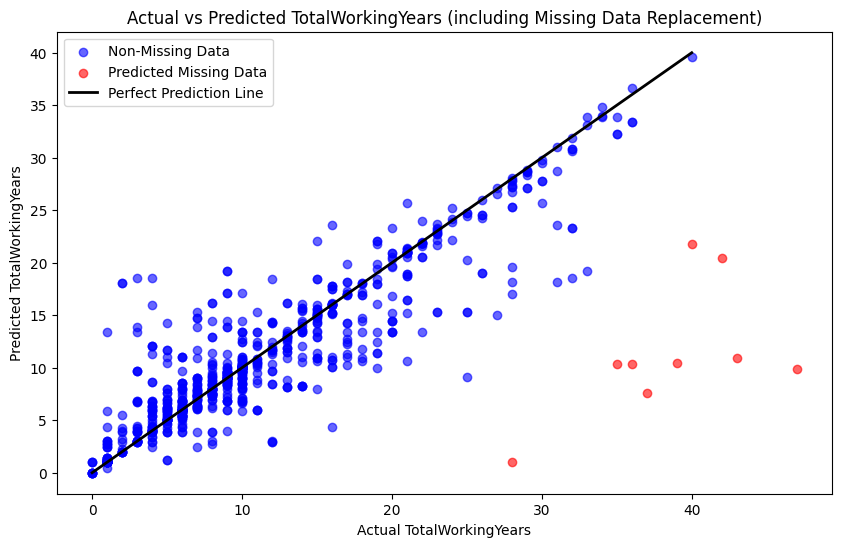

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'general_data_encoded' is the dataframe and 'TotalWorkingYears' is the target variable

# Check if there are any missing values in 'TotalWorkingYears'
missing_data = general_data_encoded[general_data_encoded['TotalWorkingYears'].isnull()]
non_missing_data = general_data_encoded[general_data_encoded['TotalWorkingYears'].notnull()]

# If there are no missing values, print a message and skip prediction
if missing_data.empty:
    print("No missing values found in 'TotalWorkingYears'. No imputation needed.")
else:
    # Select features for regression (X) and target variable (y)
    X_non_missing = non_missing_data[['Age', 'YearsAtCompany', 'YearsWithCurrManager']]  # Features
    y_non_missing = non_missing_data['TotalWorkingYears']  # Target variable

    # Split the non-missing data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_non_missing, y_non_missing, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest model
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_regressor.fit(X_train, y_train)

    # Make predictions for the test set (non-missing data)
    y_pred_non_missing = rf_regressor.predict(X_test)

    # Calculate the performance (e.g., mean squared error) on non-missing data
    mse = mean_squared_error(y_test, y_pred_non_missing)
    print(f'Mean Squared Error (non-missing data): {mse}')

    # Make predictions for the missing data (rows with NaN in 'TotalWorkingYears')
    X_missing = missing_data[['Age', 'YearsAtCompany', 'YearsWithCurrManager']]

    if not X_missing.empty:
        y_pred_missing = rf_regressor.predict(X_missing)

        # Replace the missing values in 'TotalWorkingYears' with the predicted values
        general_data_encoded.loc[general_data_encoded['TotalWorkingYears'].isnull(), 'TotalWorkingYears'] = y_pred_missing

        # Now plot the actual vs predicted values for the test set only (after replacement)
        plt.figure(figsize=(10,6))
        
        # Plot for the test set: Actual vs Predicted
        plt.scatter(y_test, y_pred_non_missing, color='blue', alpha=0.6, label='Non-Missing Data')

        # Plot for the missing values: Predicted Missing Data
        plt.scatter(missing_data['Age'], y_pred_missing, color='red', alpha=0.6, label='Predicted Missing Data')

        plt.plot([general_data_encoded['TotalWorkingYears'].min(), general_data_encoded['TotalWorkingYears'].max()],
                 [general_data_encoded['TotalWorkingYears'].min(), general_data_encoded['TotalWorkingYears'].max()],
                 color='black', lw=2, label="Perfect Prediction Line")

        plt.title('Actual vs Predicted TotalWorkingYears (including Missing Data Replacement)')
        plt.xlabel('Actual TotalWorkingYears')
        plt.ylabel('Predicted TotalWorkingYears')
        plt.legend()
        plt.show()
    else:
        print("No missing values to predict.")


In [29]:
# Age                        0.680661
# YearsAtCompany             0.627703
# YearsWithCurrManager

In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Feature (X) and Target (y)
X = cleaned_general_data[["Age"]]  # Double brackets ensure it's a 2D array
y = cleaned_general_data["TotalWorkingYears"]  # This is a 1D array

# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Predictions (optional)
y_pred = lin_reg.predict(X)

# Print coefficients
print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficient: {lin_reg.coef_[0]}")
print(f"Formula: {lin_reg.coef_[0]}x{lin_reg.intercept_}")

Intercept: -10.110676370601702
Coefficient: 0.5794477567996976
Formula: 0.5794477567996976x-10.110676370601702


In [32]:

# X_missing = general_data_encoded.loc[general_data_encoded["TotalWorkingYears"].isna(), ["Age"]]

# # Make predictions for missing values
# predicted_values = lin_reg.predict(X_missing)

# # Fill missing values with predicted values
# general_data_encoded.loc[general_data_encoded["TotalWorkingYears"].isna(), "TotalWorkingYears"] = predicted_values.round()


In [33]:
general_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   float64
 2   BusinessTravel                     4410 non-null   float64
 3   DistanceFromHome                   4410 non-null   int64  
 4   Education                          4410 non-null   int64  
 5   EmployeeID                         4410 non-null   int64  
 6   JobLevel                           4410 non-null   int64  
 7   MonthlyIncome                      4410 non-null   int64  
 8   NumCompaniesWorked                 4410 non-null   float64
 9   PercentSalaryHike                  4410 non-null   int64  
 10  StockOptionLevel                   4410 non-null   int64  
 11  TotalWorkingYears                  4410 non-null   float

In [34]:
#In general_data
print("missing data in general_data")
print(general_data.isna().sum())  # Shows the count of NaNs in each column

missing data in general_data
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
JobLevel                    0
JobRole                     0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


## Preprocessing The Data In In_Time_Data And Out_Time_Data

###  **Removed** columns where **all** the values were **NaN**.

We decided to do this because it doesn't affect the result, it doesn't make sense complete with new data for all the employees.

In [35]:
##Delete columns with NaN 
cleaned_out_time_data = out_time_data.dropna(axis=1,how='all')
cleaned_in_time_data = in_time_data.dropna(axis=1, how='all')

### **Converted** the data in the files to date format. Then, using this format, we calculated the time **in hours** by:

  - Extracting the hours.
  - Dividing the minutes by 60.
  - Dividing the seconds by 3600.
  - Adding these together to get the total hours in a float format.
  
  This process was applied separately to both files.

In [36]:
##Change a date formate
for col in cleaned_in_time_data.columns[1:]:
    cleaned_in_time_data.loc[:, col] = pd.to_datetime(cleaned_in_time_data[col], format='%Y-%m-%d %H:%M:%S', errors='coerce')

for col in cleaned_out_time_data.columns[1:]:
    cleaned_out_time_data.loc[:, col] = pd.to_datetime(cleaned_out_time_data[col], format='%Y-%m-%d %H:%M:%S', errors='coerce')

##Change the dates a hours
for col in cleaned_in_time_data.columns[1:]:
    cleaned_in_time_data.loc[:, col] = (
        pd.to_datetime(cleaned_in_time_data[col], errors='coerce').dt.hour +
        pd.to_datetime(cleaned_in_time_data[col], errors='coerce').dt.minute / 60 +
        pd.to_datetime(cleaned_in_time_data[col], errors='coerce').dt.second / 3600
    )

for col in cleaned_out_time_data.columns[1:]:
    cleaned_out_time_data.loc[:, col] = (
        pd.to_datetime(cleaned_out_time_data[col], errors='coerce').dt.hour +
        pd.to_datetime(cleaned_out_time_data[col], errors='coerce').dt.minute / 60 +
        pd.to_datetime(cleaned_out_time_data[col], errors='coerce').dt.second / 3600
    )

### For handling **NaN** values distributed across columns, we considered three approaches:
  1. **Replacing NaN with the mean**: This was discarded because it introduced incorrect data when an employee didn’t work.
  2. **Replacing NaN with 0**: This represented days off for each employee but significantly affected the mean calculation, so we decided against it.
  3. **Ignoring NaN in the calculation**: This is the option we chose, where the mean is calculated using only the days the employee worked.  
     *(However, we temporarily treated NaN as 0 to simplify subsequent operations.)*

In [37]:
#Complete the others with 0 to represent the employe doesn't went to work
# Convert columns to numeric (if necessary) and fill NaN with 0
cleaned_in_time_data = cleaned_in_time_data.apply(pd.to_numeric, errors='coerce').fillna(0)
cleaned_out_time_data = cleaned_out_time_data.apply(pd.to_numeric, errors='coerce').fillna(0)

cleaned_in_time_data

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,9.729167,10.146667,9.907222,9.575278,9.852500,10.156944,9.714722,10.218333,10.023333,...,0.000000,0.000000,9.924722,10.068333,10.240833,10.193056,10.228056,10.060000,9.903333,10.212222
1,2,10.262222,10.351389,0.000000,9.754722,10.151111,9.723889,10.001944,10.724722,9.632500,...,9.252222,10.621389,9.817222,10.564167,10.202778,0.000000,9.529167,9.930278,10.540278,9.455556
2,3,10.294722,9.847222,10.236944,9.790833,10.061111,10.096944,10.063056,10.357222,9.919722,...,9.888056,10.253889,10.174444,9.745556,10.265000,10.123889,9.701389,9.726667,9.568056,10.477500
3,4,10.085000,9.942222,10.185278,9.625000,10.035556,10.136667,10.228333,9.889444,10.013889,...,9.910000,10.293889,9.972500,10.073611,10.196111,9.720833,9.878889,9.554444,10.303333,10.020833
4,5,10.471389,9.832778,9.757778,9.826944,10.328889,10.013889,10.490833,9.992222,10.103333,...,9.776389,9.976389,10.061389,10.175000,10.226667,9.740000,10.087500,10.514722,9.305833,9.685833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,9.342222,10.298056,10.447500,10.116111,9.751667,9.823333,9.619444,9.417222,9.488056,...,10.089444,10.018333,10.423611,10.269722,10.077778,9.761111,10.260833,10.169167,9.471944,10.003333
4406,4407,10.061389,0.000000,9.733333,9.702778,10.015833,9.734444,10.125556,10.086389,10.303056,...,9.763611,9.458889,9.690000,9.841667,10.539167,9.794722,9.906389,10.225556,10.352500,10.163333
4407,4408,10.016944,9.550000,9.821389,10.470000,9.793889,10.017500,9.820000,9.786111,10.141944,...,10.026667,10.015833,9.851944,10.036111,9.974722,9.934722,9.990000,0.000000,10.043333,10.058333
4408,4409,10.284722,10.040833,10.213889,10.208611,9.715833,0.000000,10.010556,9.800833,9.071389,...,9.861111,9.909167,10.018889,10.171944,9.708333,9.934722,9.923611,9.911667,10.262222,9.946389


In [38]:
cleaned_out_time_data

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,16.937500,17.336389,17.318056,16.581944,17.142222,17.641389,16.977500,18.049444,17.370278,...,0.000000,0.000000,17.263889,17.464167,16.745556,17.789444,18.001944,17.375000,17.682222,17.292500
1,2,18.371389,17.806111,0.000000,17.151667,17.567778,16.874722,17.613333,18.003611,17.245556,...,17.180556,18.524444,17.571111,18.276389,17.638333,0.000000,17.143889,17.912778,18.526389,17.682778
2,3,16.987222,17.112778,16.642222,16.555833,17.406111,16.958333,17.481667,17.356944,17.358056,...,17.106389,17.039722,17.338056,16.547222,16.995278,16.973611,16.725278,17.165556,17.106944,17.263889
3,4,17.423333,17.234167,17.128333,16.544444,16.886389,17.329722,17.226944,17.195833,16.890556,...,17.365833,17.923056,16.819167,17.400000,17.609722,16.805833,17.326111,16.971111,17.669722,17.153889
4,5,18.526944,17.820833,17.440278,17.633056,17.991111,17.735556,18.855833,18.249444,18.363333,...,18.096389,17.880000,17.726389,18.132500,18.013611,17.989444,17.749722,18.783333,17.259167,17.703889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,17.460278,19.138889,18.846944,18.961111,17.975278,18.104167,17.980000,18.176389,17.843611,...,18.594167,18.101389,18.585000,18.562222,18.682222,18.358056,18.743056,19.243889,18.415556,18.511389
4406,4407,16.316944,0.000000,15.126944,15.430556,16.209167,15.448889,16.178333,16.378611,16.316667,...,15.747222,15.383889,15.520556,15.766389,16.649722,15.787500,15.576111,16.783889,16.054722,16.310833
4407,4408,17.293056,17.135278,17.462778,18.456111,17.090278,17.049167,17.595833,17.264444,18.264722,...,17.711944,17.801389,17.718056,17.789722,17.726944,17.336667,17.724444,0.000000,17.803889,18.148611
4408,4409,19.810278,19.627778,20.002222,19.599722,18.920278,0.000000,19.304722,19.400556,18.555833,...,19.116111,19.878889,19.359722,19.544444,18.950000,19.632500,19.976667,18.923889,19.622778,19.562500


### Calculated the hours worked per day
 After preparing the two files, we calculated the difference between them to determine the hours each employee worked each day throughout the year.

In [39]:
# Create a new dataframe to save the result
result_data = cleaned_out_time_data.copy()  

# Calculate the hours worked by subtracting the arrival time from the departure time
for col in cleaned_in_time_data.columns[1:]:
    result_data.loc[:, col] = (
        cleaned_out_time_data[col] - cleaned_in_time_data[col]
    )

result_data

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,7.208333,7.189722,7.410833,7.006667,7.289722,7.484444,7.262778,7.831111,7.346944,...,0.000000,0.000000,7.339167,7.395833,6.504722,7.596389,7.773889,7.315000,7.778889,7.080278
1,2,8.109167,7.454722,0.000000,7.396944,7.416667,7.150833,7.611389,7.278889,7.613056,...,7.928333,7.903056,7.753889,7.712222,7.435556,0.000000,7.614722,7.982500,7.986111,8.227222
2,3,6.692500,7.265556,6.405278,6.765000,7.345000,6.861389,7.418611,6.999722,7.438333,...,7.218333,6.785833,7.163611,6.801667,6.730278,6.849722,7.023889,7.438889,7.538889,6.786389
3,4,7.338333,7.291944,6.943056,6.919444,6.850833,7.193056,6.998611,7.306389,6.876667,...,7.455833,7.629167,6.846667,7.326389,7.413611,7.085000,7.447222,7.416667,7.366389,7.133056
4,5,8.055556,7.988056,7.682500,7.806111,7.662222,7.721667,8.365000,8.257222,8.260000,...,8.320000,7.903611,7.665000,7.957500,7.786944,8.249444,7.662222,8.268611,7.953333,8.018056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,8.118056,8.840833,8.399444,8.845000,8.223611,8.280833,8.360556,8.759167,8.355556,...,8.504722,8.083056,8.161389,8.292500,8.604444,8.596944,8.482222,9.074722,8.943611,8.508056
4406,4407,6.255556,0.000000,5.393611,5.727778,6.193333,5.714444,6.052778,6.292222,6.013611,...,5.983611,5.925000,5.830556,5.924722,6.110556,5.992778,5.669722,6.558333,5.702222,6.147500
4407,4408,7.276111,7.585278,7.641389,7.986111,7.296389,7.031667,7.775833,7.478333,8.122778,...,7.685278,7.785556,7.866111,7.753611,7.752222,7.401944,7.734444,0.000000,7.760556,8.090278
4408,4409,9.525556,9.586944,9.788333,9.391111,9.204444,0.000000,9.294167,9.599722,9.484444,...,9.255000,9.969722,9.340833,9.372500,9.241667,9.697778,10.053056,9.012222,9.360556,9.616111


### Create a new dataset with the new information to compare the results
Using this data, we computed a new dataset with two columns:
  - **"Mean_worked_hours"**: This reflects the average hours worked per day, excluding non-working days.
  - **"Mean_work_hours_per_day"**: This includes non-working days (represented by 0) in the calculation, purely to highlight the difference between these two methods.

In [40]:
comparetion_result = result_data.iloc[:, [0]].copy()

comparetion_result['MeanWorkedHoursZero'] = result_data.iloc[:, 1:].mean(axis=1).round(2) #iloc[:, 1:] is for selects from the second column to the last column.

# Filter the columns (exclude the first one, which is ID)
worked_data = result_data.iloc[:, 1:]

# Keep only the values greater than 0 (days the employee worked)
worked_data = worked_data[worked_data > 0]

# Calculate the mean worked hours for each row (employee) individually
comparetion_result['MeanWorkedHours'] = worked_data.mean(axis=1).round(2)

comparetion_result

,Unnamed: 0,MeanWorkedHoursZero,MeanWorkedHours
0,1,6.87,7.37
1,2,7.32,7.72
2,3,6.82,7.01
3,4,6.79,7.19
4,5,7.88,8.01
...,...,...,...
4405,4406,8.32,8.52
4406,4407,5.90,6.09
4407,4408,7.15,7.71
4408,4409,9.19,9.49


### Finaly, how we chose the third option we **add** 'Mean_worked_hours' to 'general_data_encoded'

In [41]:
general_data_encoded['MeanWorkedHours'] = comparetion_result.iloc[:, [2]].copy()
general_data_encoded

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MeanWorkedHours
0,51,0.0,1.0,6,2,1,1,131160,1.0,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.37
1,31,1.0,2.0,10,1,2,1,41890,0.0,23,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.72
2,32,0.0,2.0,17,4,3,4,193280,1.0,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.01
3,38,0.0,0.0,2,5,4,3,83210,3.0,11,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.19
4,32,0.0,1.0,10,1,5,1,23420,4.0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0.0,1.0,5,4,4406,1,60290,3.0,17,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.52
4406,29,0.0,1.0,2,4,4407,1,26790,2.0,15,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.09
4407,25,0.0,1.0,25,2,4408,2,37020,0.0,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.71
4408,42,0.0,1.0,18,2,4409,1,23980,0.0,14,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.49


In [42]:
cleaned_general_data = general_data.dropna()
general_data_labels = cleaned_general_data["TotalWorkingYears"].copy()  # y
general_data_prepared = cleaned_general_data["Age"].copy()  # X

# Reshape general_data_prepared to be 2-dimensional
general_data_prepared = general_data_prepared.values.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(general_data_prepared, general_data_labels)

lin_predict = lin_reg.predict(general_data_prepared)

print("Predictions:", lin_predict)
#print("Labels:", list(some_labels)) # vraies valeurs

print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficient: {lin_reg.coef_[0]}")

Predictions: [19.44115923  7.85220409  8.43165185 ...  6.69330858  4.37551755
 14.22612941]
Intercept: -10.110676370601702
Coefficient: 0.5794477567996976


### Add new column "MissingDays" 

In [44]:
comparetion_result["DaysMissed"] = (result_data.iloc[:, 1:] == 0).sum(axis=1)

comparetion_result["PercentageMissed"] = ((comparetion_result["DaysMissed"] / result_data.iloc[:, 1:].shape[1]) * 100).round(2)

comparetion_result

general_data_encoded["PercentageMissedWork"] = comparetion_result.iloc[:, [4]].copy()

general_data_encoded

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MeanWorkedHours,PercentageMissedWork
0,51,0.0,1.0,6,2,1,1,131160,1.0,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.37,6.83
1,31,1.0,2.0,10,1,2,1,41890,0.0,23,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.72,5.22
2,32,0.0,2.0,17,4,3,4,193280,1.0,15,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.01,2.81
3,38,0.0,0.0,2,5,4,3,83210,3.0,11,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.19,5.62
4,32,0.0,1.0,10,1,5,1,23420,4.0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.01,1.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0.0,1.0,5,4,4406,1,60290,3.0,17,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.52,2.41
4406,29,0.0,1.0,2,4,4407,1,26790,2.0,15,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.09,3.21
4407,25,0.0,1.0,25,2,4408,2,37020,0.0,20,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.71,7.23
4408,42,0.0,1.0,18,2,4409,1,23980,0.0,14,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.49,3.21


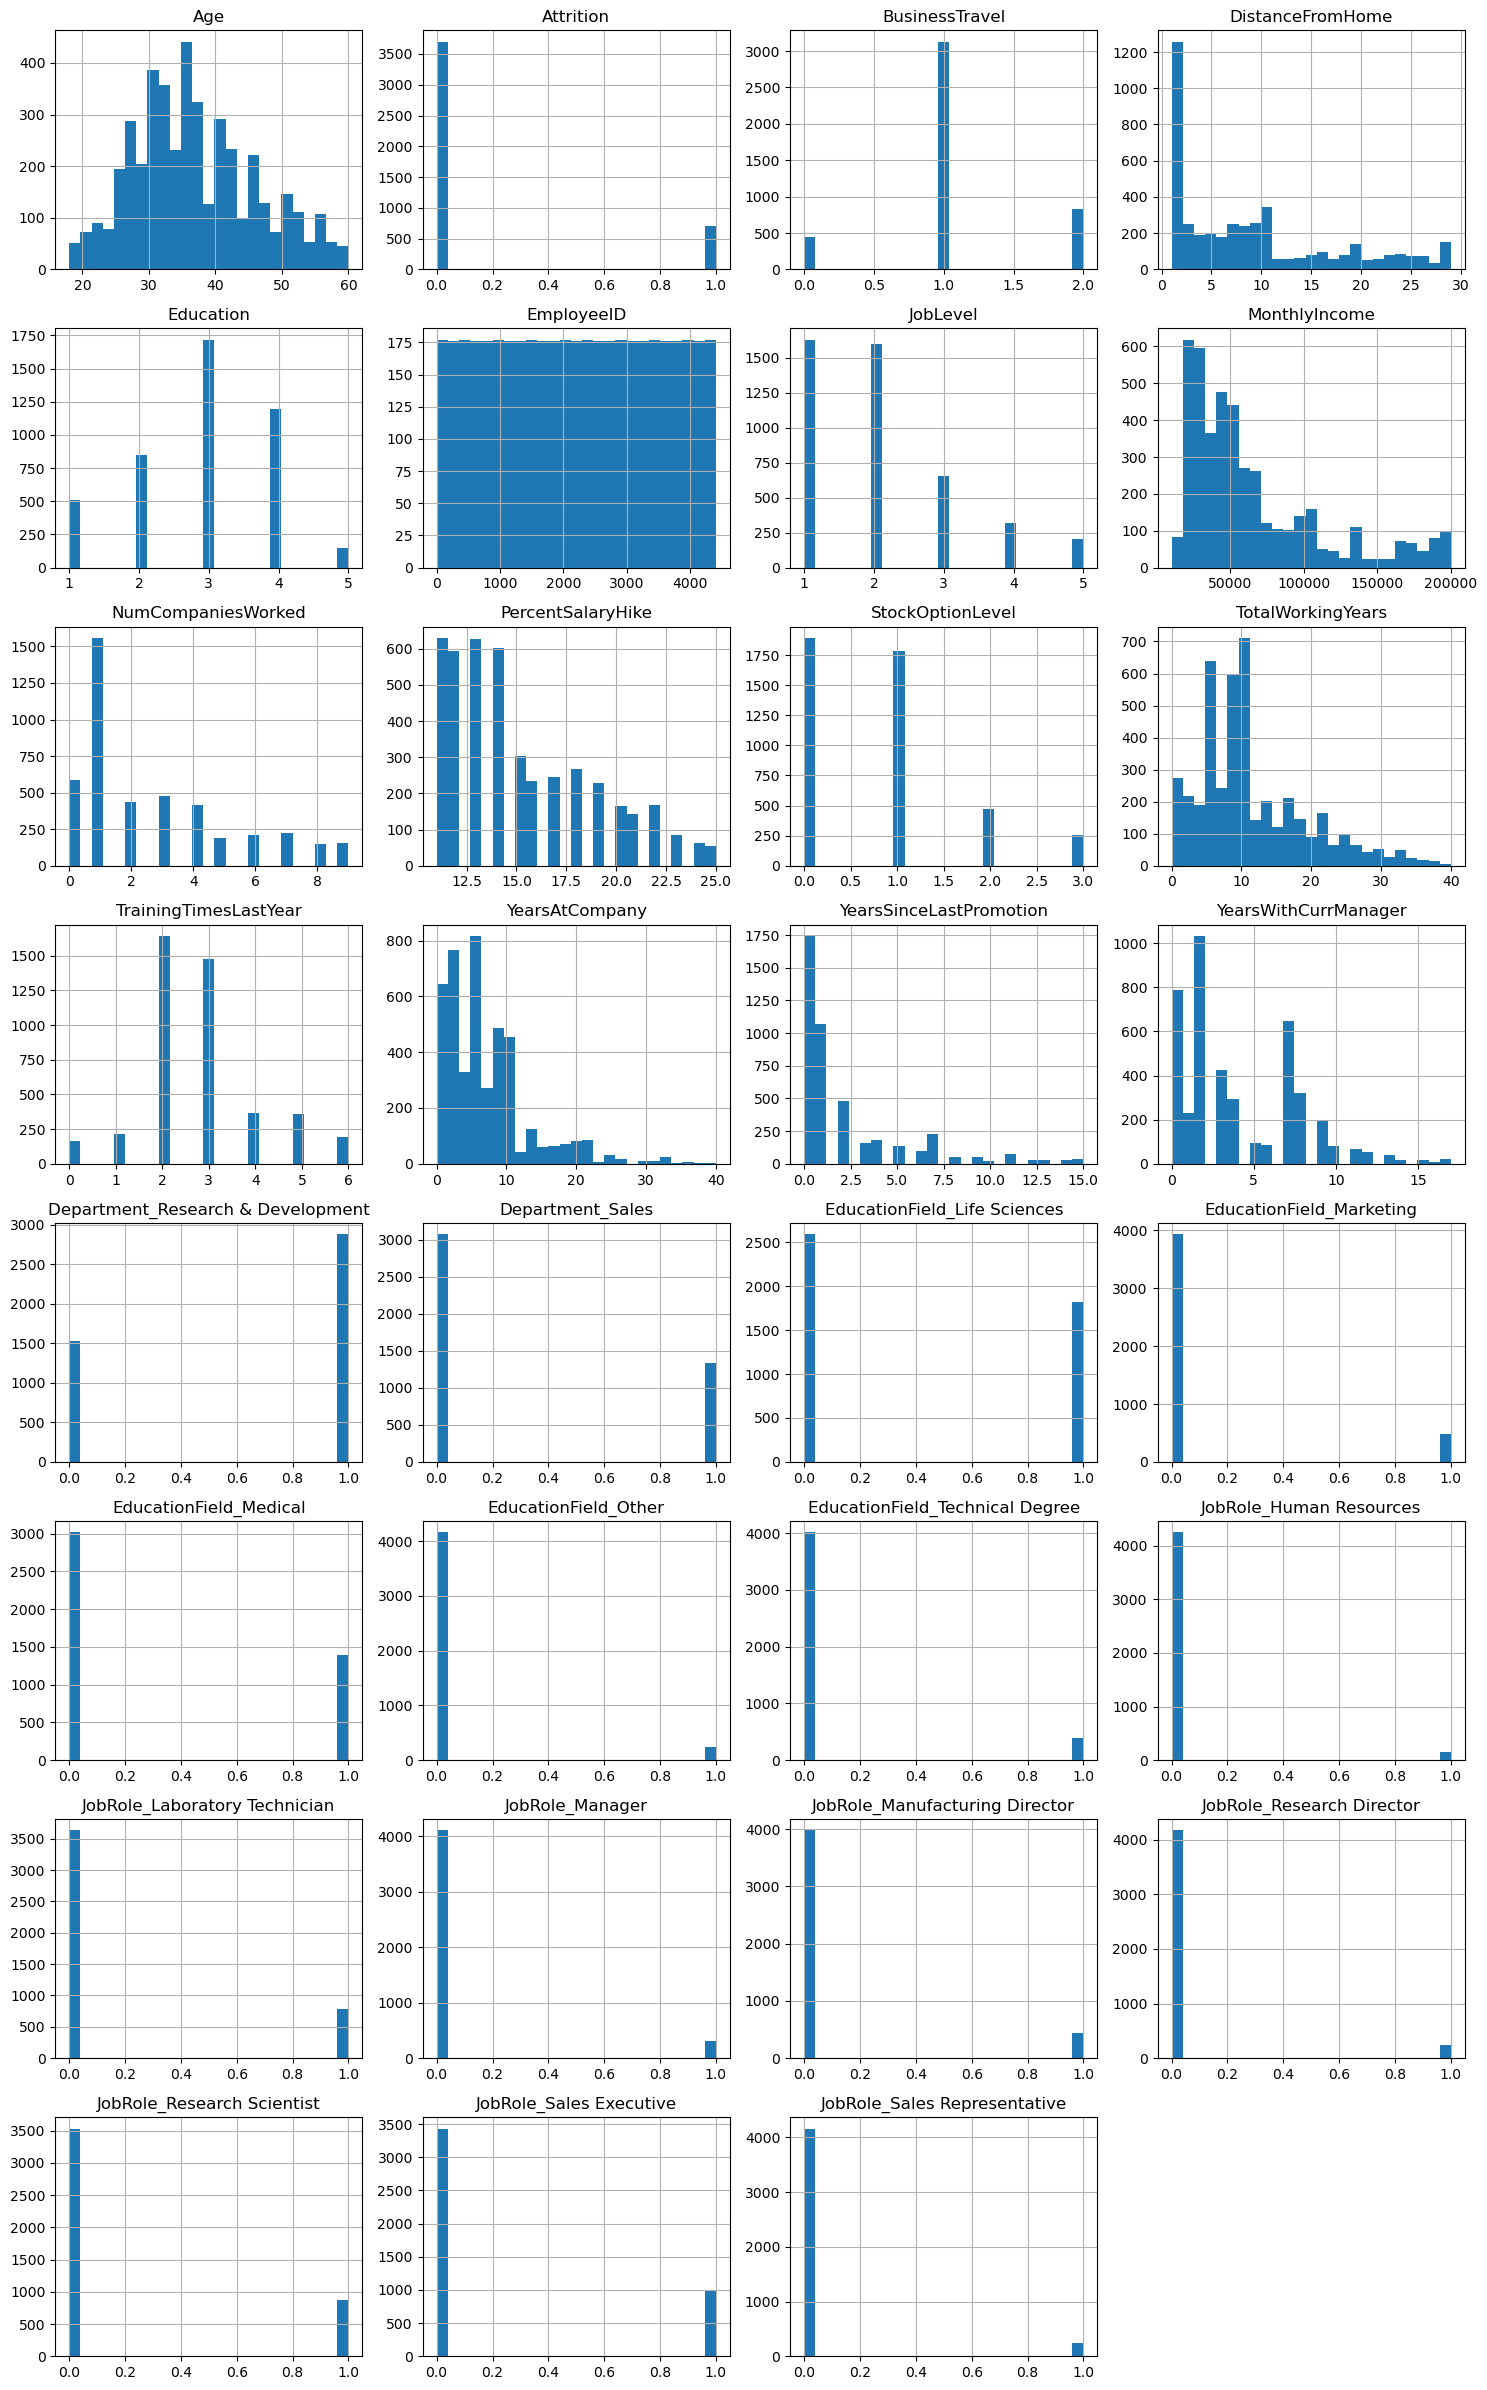

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define number of columns per row
cols_per_row = 4
num_features = len(general_data_encoded.columns)

# Calculate number of rows needed
num_rows = int(np.ceil(num_features / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 3))
axes = axes.flatten()  # Flatten to easily iterate

# Plot each column
for i, column in enumerate(general_data_encoded.columns):
    general_data_encoded[column].hist(bins=25, ax=axes[i])
    axes[i].set_title(column)

# Hide any unused subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Improve layout
plt.tight_layout()
plt.show()


In [ ]:
general_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   float64
 2   BusinessTravel                     4410 non-null   float64
 3   DistanceFromHome                   4410 non-null   int64  
 4   Education                          4410 non-null   int64  
 5   EmployeeID                         4410 non-null   int64  
 6   JobLevel                           4410 non-null   int64  
 7   MonthlyIncome                      4410 non-null   int64  
 8   NumCompaniesWorked                 4391 non-null   float64
 9   PercentSalaryHike                  4410 non-null   int64  
 10  StockOptionLevel                   4410 non-null   int64  
 11  TotalWorkingYears                  4401 non-null   float

In [ ]:
employee_survey_data

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


# ?. Business Problem

In [56]:
# List of DataFrames to merge
dfs = [general_data_encoded, manager_survey_data, employee_survey_data]

# Perform the merge
merged_general_data = reduce(lambda left, right: pd.merge(left, right, on="EmployeeID", how="inner"), dfs)

# Display the merged DataFrame info
merged_general_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   float64
 2   BusinessTravel                     4410 non-null   float64
 3   DistanceFromHome                   4410 non-null   int64  
 4   Education                          4410 non-null   int64  
 5   EmployeeID                         4410 non-null   int64  
 6   JobLevel                           4410 non-null   int64  
 7   MonthlyIncome                      4410 non-null   int64  
 8   NumCompaniesWorked                 4410 non-null   float64
 9   PercentSalaryHike                  4410 non-null   int64  
 10  StockOptionLevel                   4410 non-null   int64  
 11  TotalWorkingYears                  4410 non-null   float

In [58]:
merged_general_data

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MeanWorkedHours,PercentageMissedWork,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0.0,1.0,6,2,1,1,131160,1.0,11,...,0.0,0.0,0.0,7.37,6.83,3,3,3.0,4.0,2.0
1,31,1.0,2.0,10,1,2,1,41890,0.0,23,...,1.0,0.0,0.0,7.72,5.22,2,4,3.0,2.0,4.0
2,32,0.0,2.0,17,4,3,4,193280,1.0,15,...,0.0,1.0,0.0,7.01,2.81,3,3,2.0,2.0,1.0
3,38,0.0,0.0,2,5,4,3,83210,3.0,11,...,0.0,0.0,0.0,7.19,5.62,2,3,4.0,4.0,3.0
4,32,0.0,1.0,10,1,5,1,23420,4.0,12,...,0.0,1.0,0.0,8.01,1.61,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0.0,1.0,5,4,4406,1,60290,3.0,17,...,1.0,0.0,0.0,8.52,2.41,3,3,4.0,1.0,3.0
4406,29,0.0,1.0,2,4,4407,1,26790,2.0,15,...,0.0,0.0,0.0,6.09,3.21,2,3,4.0,4.0,3.0
4407,25,0.0,1.0,25,2,4408,2,37020,0.0,20,...,0.0,1.0,0.0,7.71,7.23,3,4,1.0,3.0,3.0
4408,42,0.0,1.0,18,2,4409,1,23980,0.0,14,...,0.0,0.0,0.0,9.49,3.21,2,3,4.0,1.0,3.0


In [61]:
merged_general_data.dropna()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MeanWorkedHours,PercentageMissedWork,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0.0,1.0,6,2,1,1,131160,1.0,11,...,0.0,0.0,0.0,7.37,6.83,3,3,3.0,4.0,2.0
1,31,1.0,2.0,10,1,2,1,41890,0.0,23,...,1.0,0.0,0.0,7.72,5.22,2,4,3.0,2.0,4.0
2,32,0.0,2.0,17,4,3,4,193280,1.0,15,...,0.0,1.0,0.0,7.01,2.81,3,3,2.0,2.0,1.0
3,38,0.0,0.0,2,5,4,3,83210,3.0,11,...,0.0,0.0,0.0,7.19,5.62,2,3,4.0,4.0,3.0
4,32,0.0,1.0,10,1,5,1,23420,4.0,12,...,0.0,1.0,0.0,8.01,1.61,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0.0,1.0,4,3,4405,2,35390,1.0,18,...,0.0,0.0,0.0,7.29,2.41,2,3,3.0,4.0,3.0
4405,42,0.0,1.0,5,4,4406,1,60290,3.0,17,...,1.0,0.0,0.0,8.52,2.41,3,3,4.0,1.0,3.0
4406,29,0.0,1.0,2,4,4407,1,26790,2.0,15,...,0.0,0.0,0.0,6.09,3.21,2,3,4.0,4.0,3.0
4407,25,0.0,1.0,25,2,4408,2,37020,0.0,20,...,0.0,1.0,0.0,7.71,7.23,3,4,1.0,3.0,3.0


In [59]:
general_data_encoded

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MeanWorkedHours,PercentageMissedWork
0,51,0.0,1.0,6,2,1,1,131160,1.0,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.37,6.83
1,31,1.0,2.0,10,1,2,1,41890,0.0,23,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.72,5.22
2,32,0.0,2.0,17,4,3,4,193280,1.0,15,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.01,2.81
3,38,0.0,0.0,2,5,4,3,83210,3.0,11,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.19,5.62
4,32,0.0,1.0,10,1,5,1,23420,4.0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.01,1.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0.0,1.0,5,4,4406,1,60290,3.0,17,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.52,2.41
4406,29,0.0,1.0,2,4,4407,1,26790,2.0,15,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.09,3.21
4407,25,0.0,1.0,25,2,4408,2,37020,0.0,20,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.71,7.23
4408,42,0.0,1.0,18,2,4409,1,23980,0.0,14,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.49,3.21


Mean Squared Error: 16.34


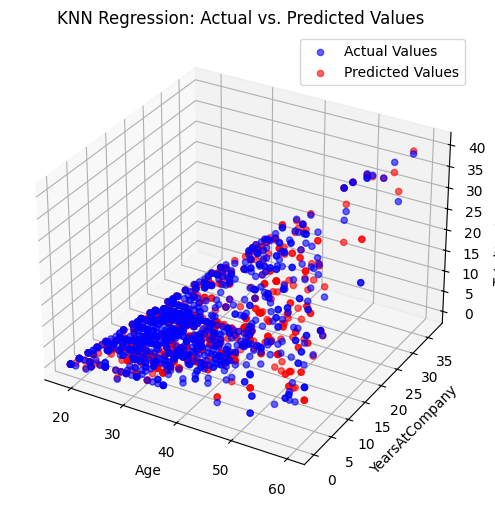

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

# Features and Target Variable (Regression)
X = cleaned_general_data[['Age', 'YearsAtCompany']]
y = cleaned_general_data['TotalWorkingYears']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor (choosing k=3 neighbors)
knn = KNeighborsRegressor(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# 3D Scatter Plot: Actual vs. Predicted
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual values
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_test, color='blue', label='Actual Values', alpha=0.6)

# Scatter plot for predicted values
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_pred, color='red', label='Predicted Values', alpha=0.6)

# Labels and Title
ax.set_xlabel("Age")
ax.set_ylabel("YearsAtCompany")
ax.set_zlabel("TotalWorkingYears")
ax.set_title("KNN Regression: Actual vs. Predicted Values")

ax.legend()
plt.show()


In [60]:
# Define the column name as a variable
column_name = 'TotalWorkingYears'

# Correlation analysis with other numeric columns
print(f"Correlation matrix of '{column_name}' with other columns:")
corr_matrix = merged_general_data.corr(numeric_only=True)  # Calculate the correlation matrix for numeric columns only
column_corr = corr_matrix[column_name].sort_values(ascending=False)  # Sort by correlation value
print(column_corr)  # Display the correlation values for the selected column

Correlation matrix of 'TotalWorkingYears' with other columns:
TotalWorkingYears                    1.000000
Age                                  0.680508
YearsAtCompany                       0.628077
YearsWithCurrManager                 0.459095
YearsSinceLastPromotion              0.404878
NumCompaniesWorked                   0.237672
Department_Research & Development    0.050344
EducationField_Technical Degree      0.037020
JobRole_Laboratory Technician        0.036768
JobRole_Manager                      0.021482
JobRole_Human Resources              0.017721
JobRole_Sales Executive              0.016513
DistanceFromHome                     0.010063
EducationField_Life Sciences         0.009076
BusinessTravel                       0.008256
EducationField_Medical               0.007530
JobInvolvement                       0.006480
PercentageMissedWork                 0.003792
StockOptionLevel                     0.002072
WorkLifeBalance                      0.001027
EmployeeID        

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


# Select only numeric columns (scatter_matrix does not support categorical)
numeric_data = merged_general_data.select_dtypes(include=['number'])
numeric_data_no_attrition = numeric_data.copy()



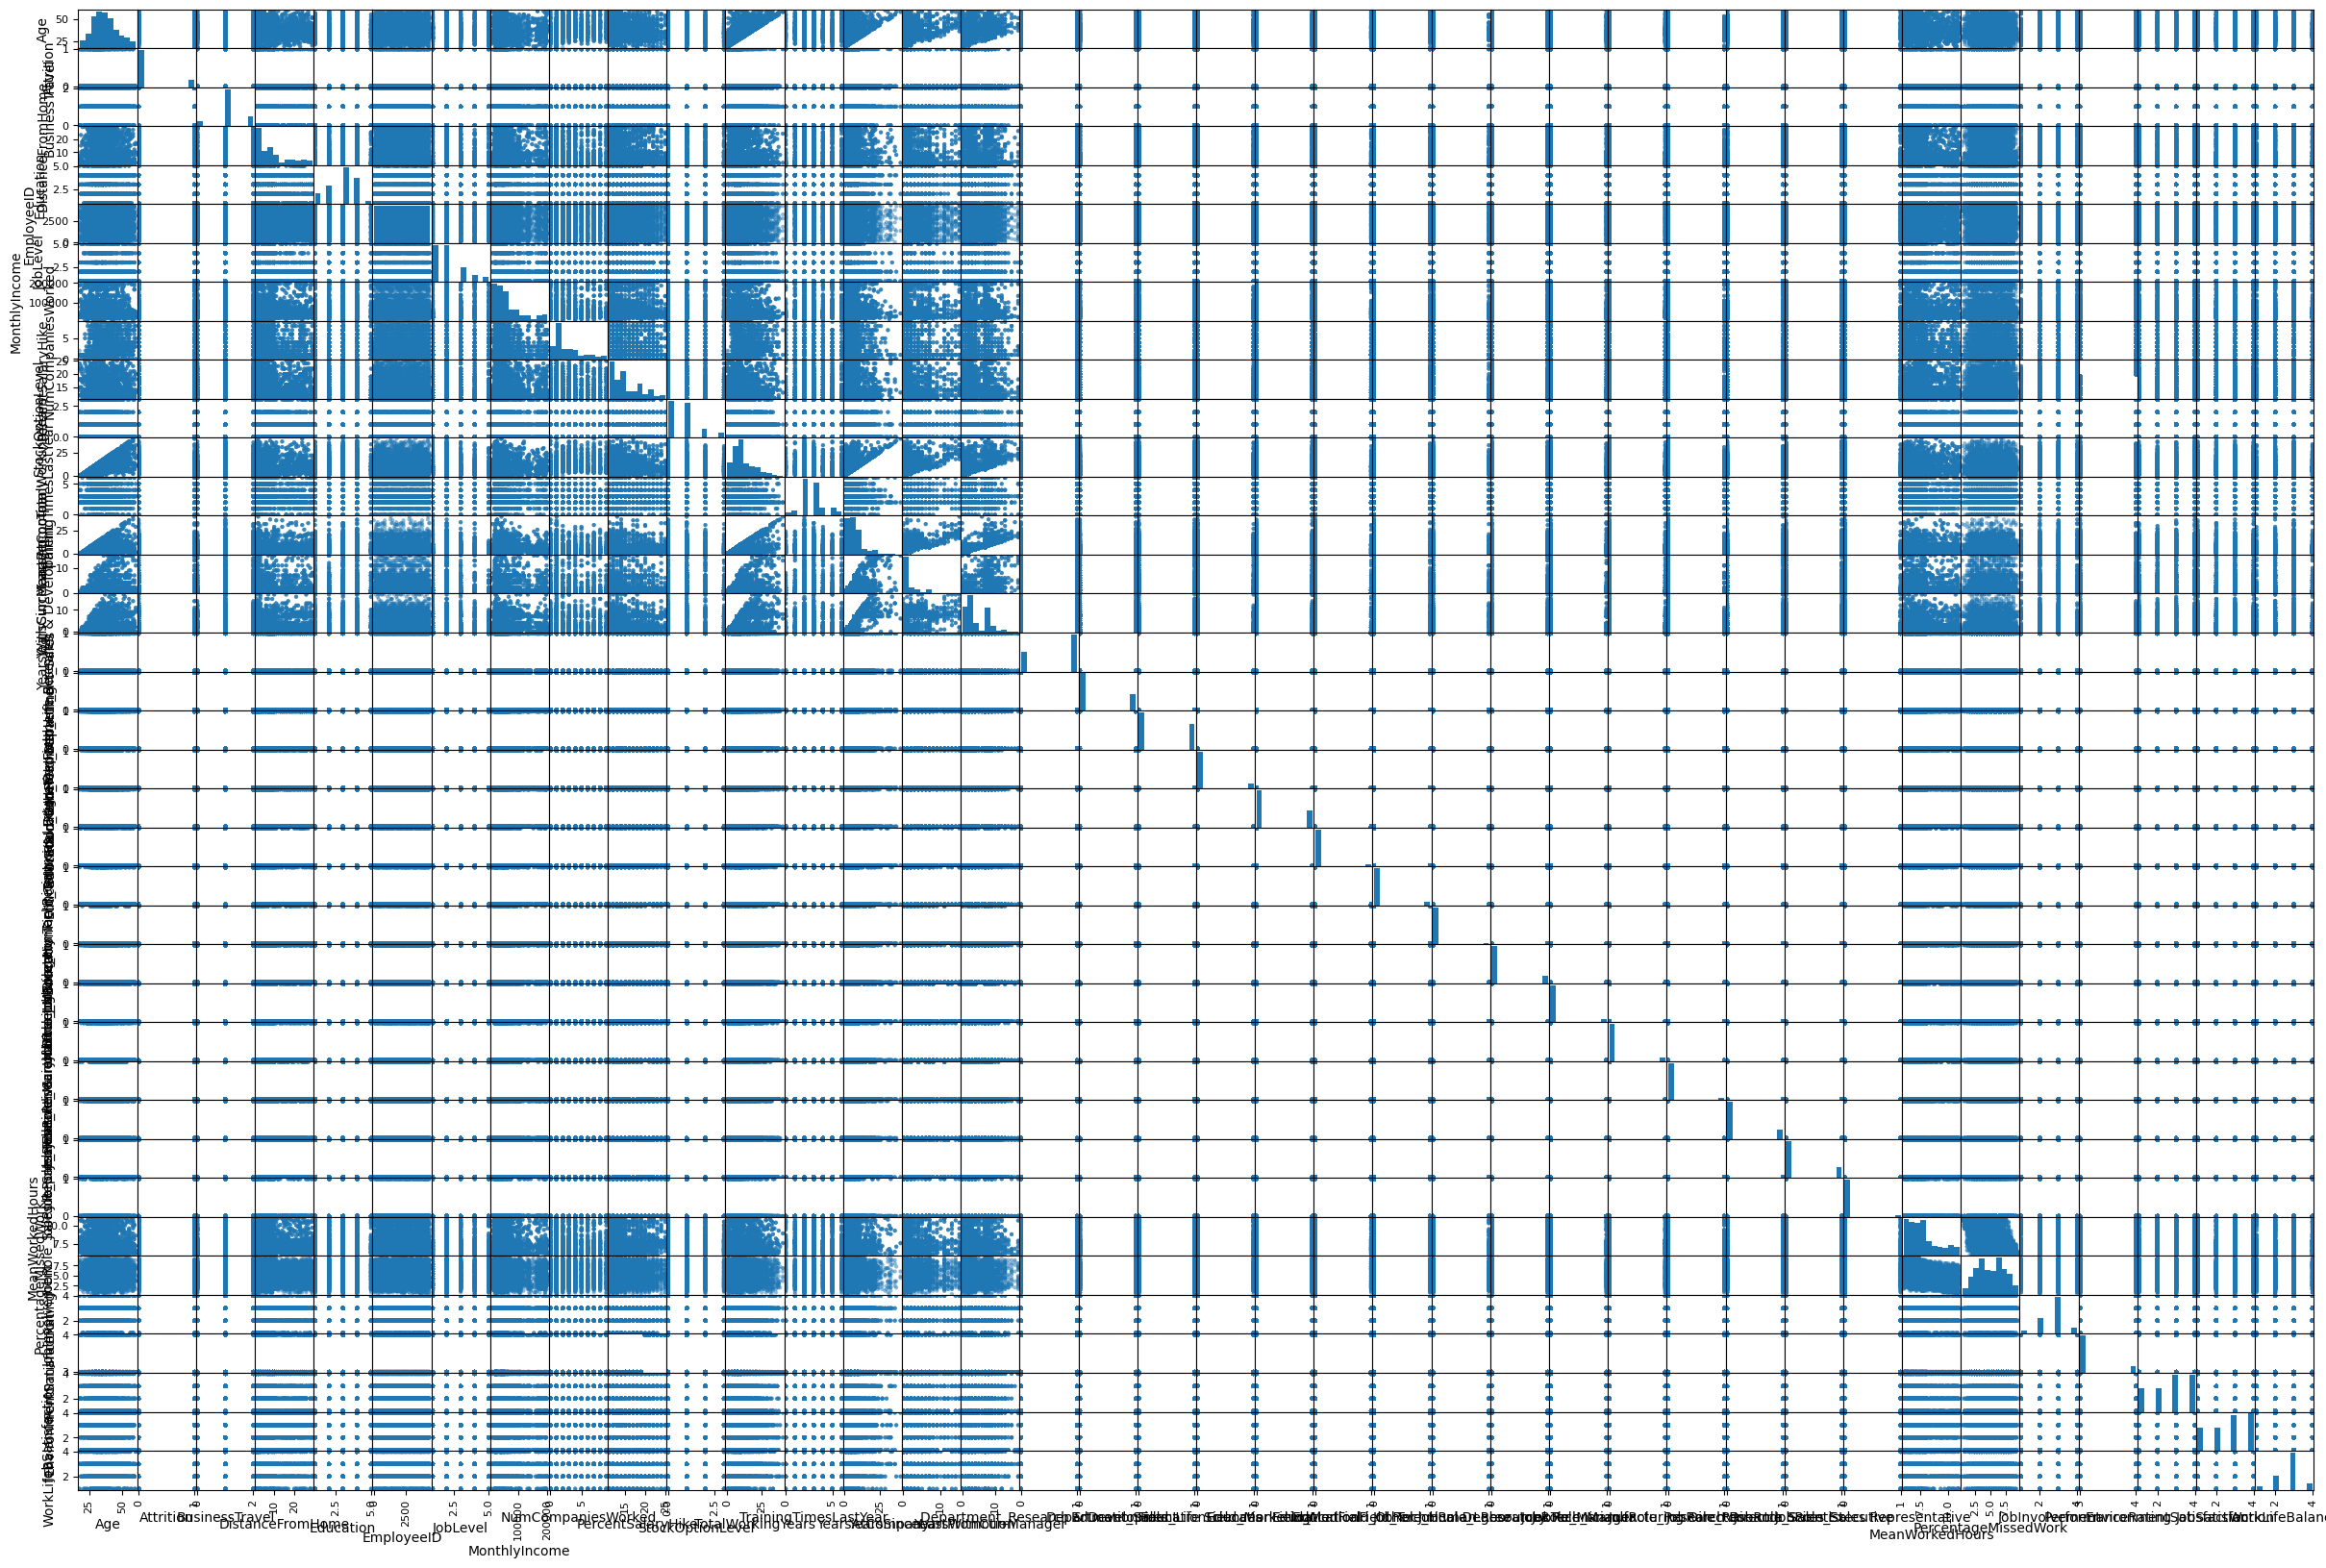

In [68]:
scatter_matrix(numeric_data, figsize=(30, 20), alpha=0.5, diagonal='hist')
plt.show()


In [75]:
columns_to_drop = ["EmployeeID"]

existing_columns = [col for col in columns_to_drop if col in numeric_data.columns]

if existing_columns:
    numeric_data = numeric_data.drop(columns=existing_columns)
    print(f"Dropped columns: {existing_columns}")
else:
    print(f"No columns were dropped. They were not found or already deleted")

No columns were dropped. They were not found or already deleted


In [77]:
columns_to_drop = ["EmployeeID","Attrition"]

existing_columns = [col for col in columns_to_drop if col in numeric_data_no_attrition.columns]

if existing_columns:
    numeric_data_no_attrition = numeric_data_no_attrition.drop(columns=existing_columns)
    print(f"Dropped columns: {existing_columns}")
else:
    print(f"No columns were dropped. They were not found or already deleted")

Dropped columns: ['Attrition']


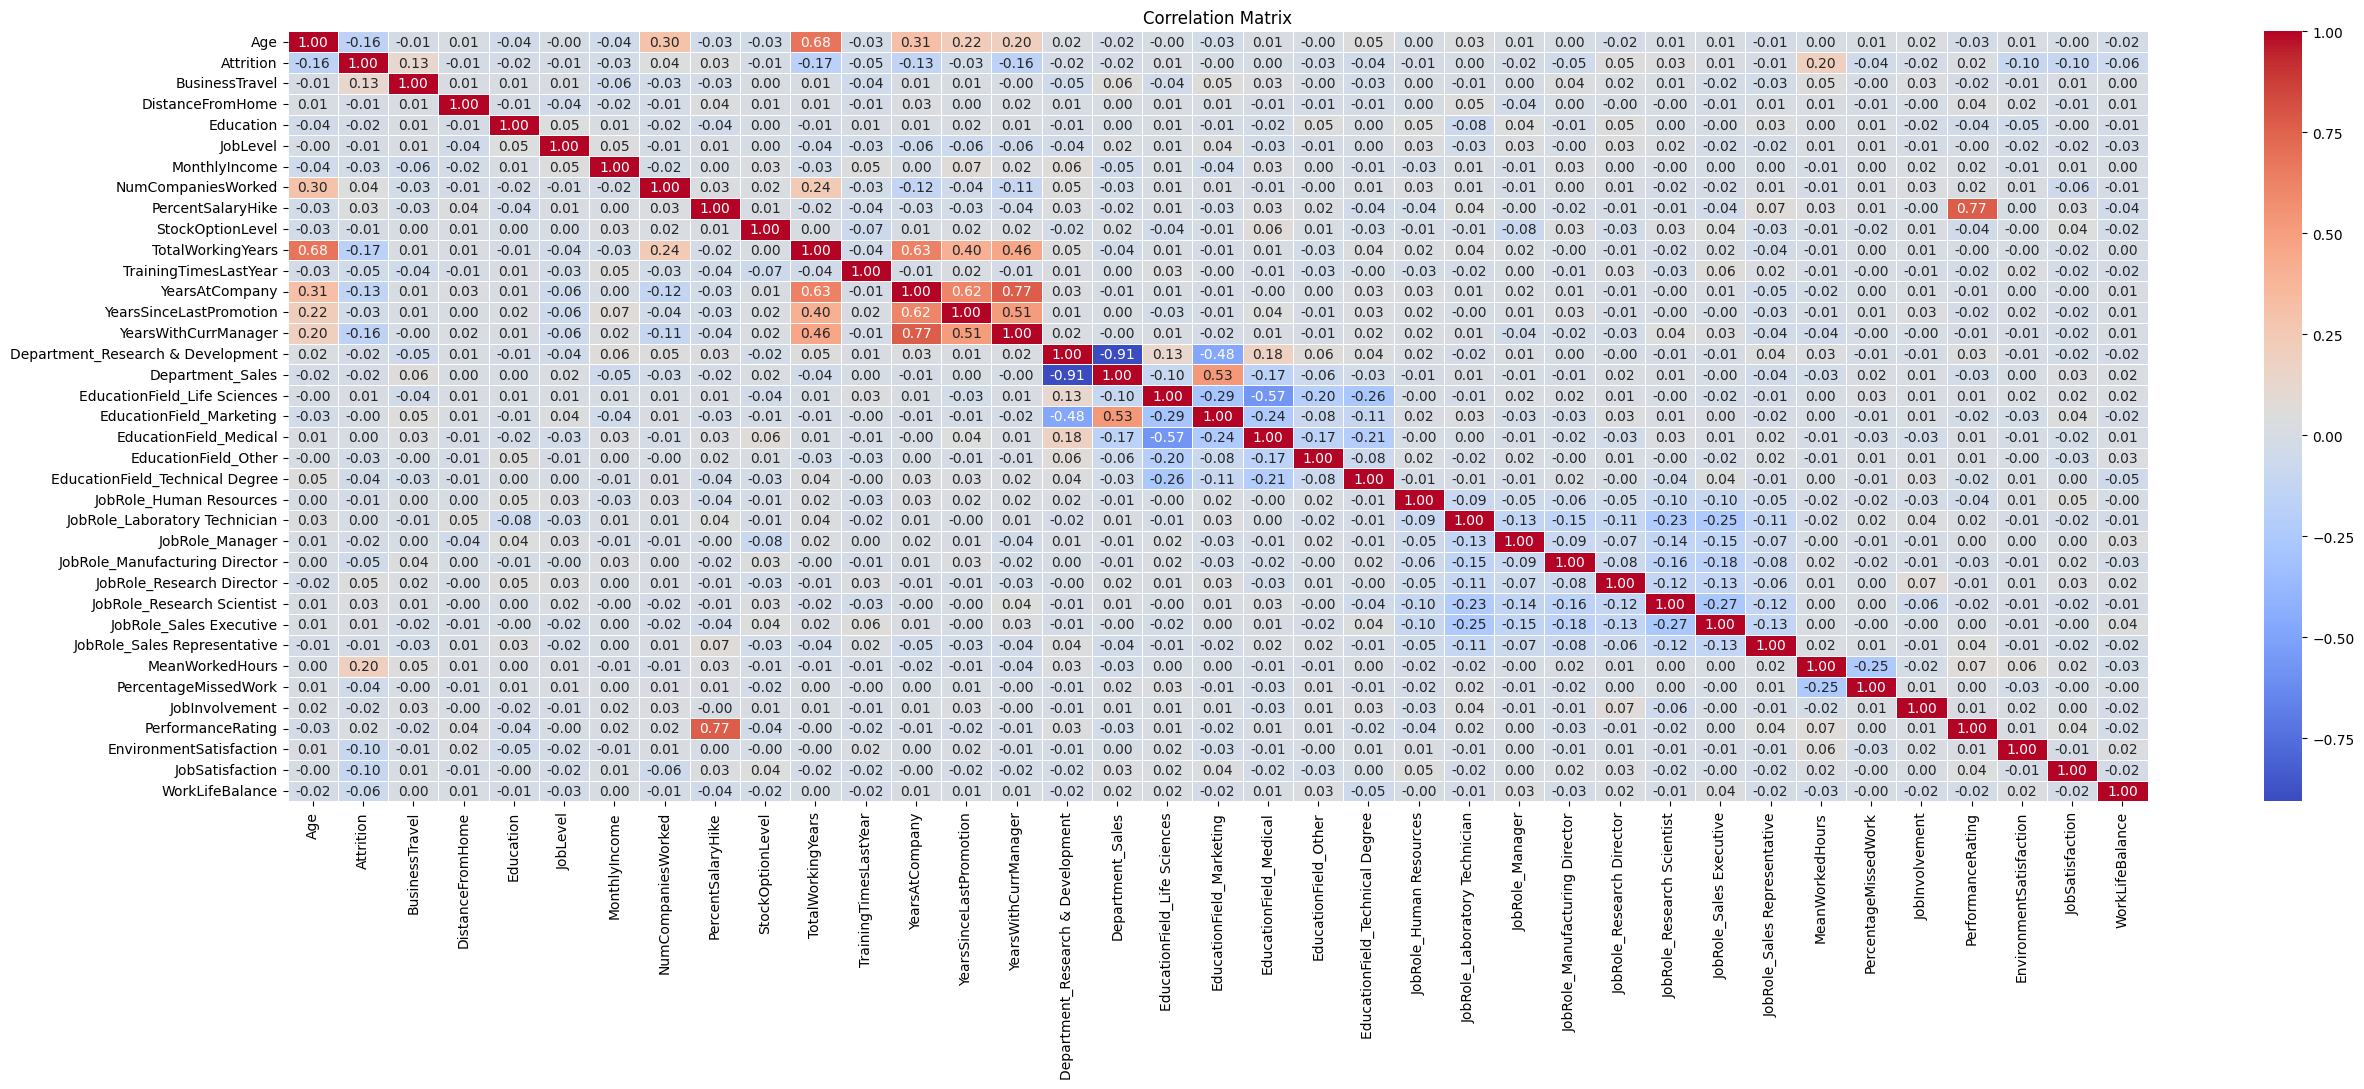

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(30, 10))  # Adjust the figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()


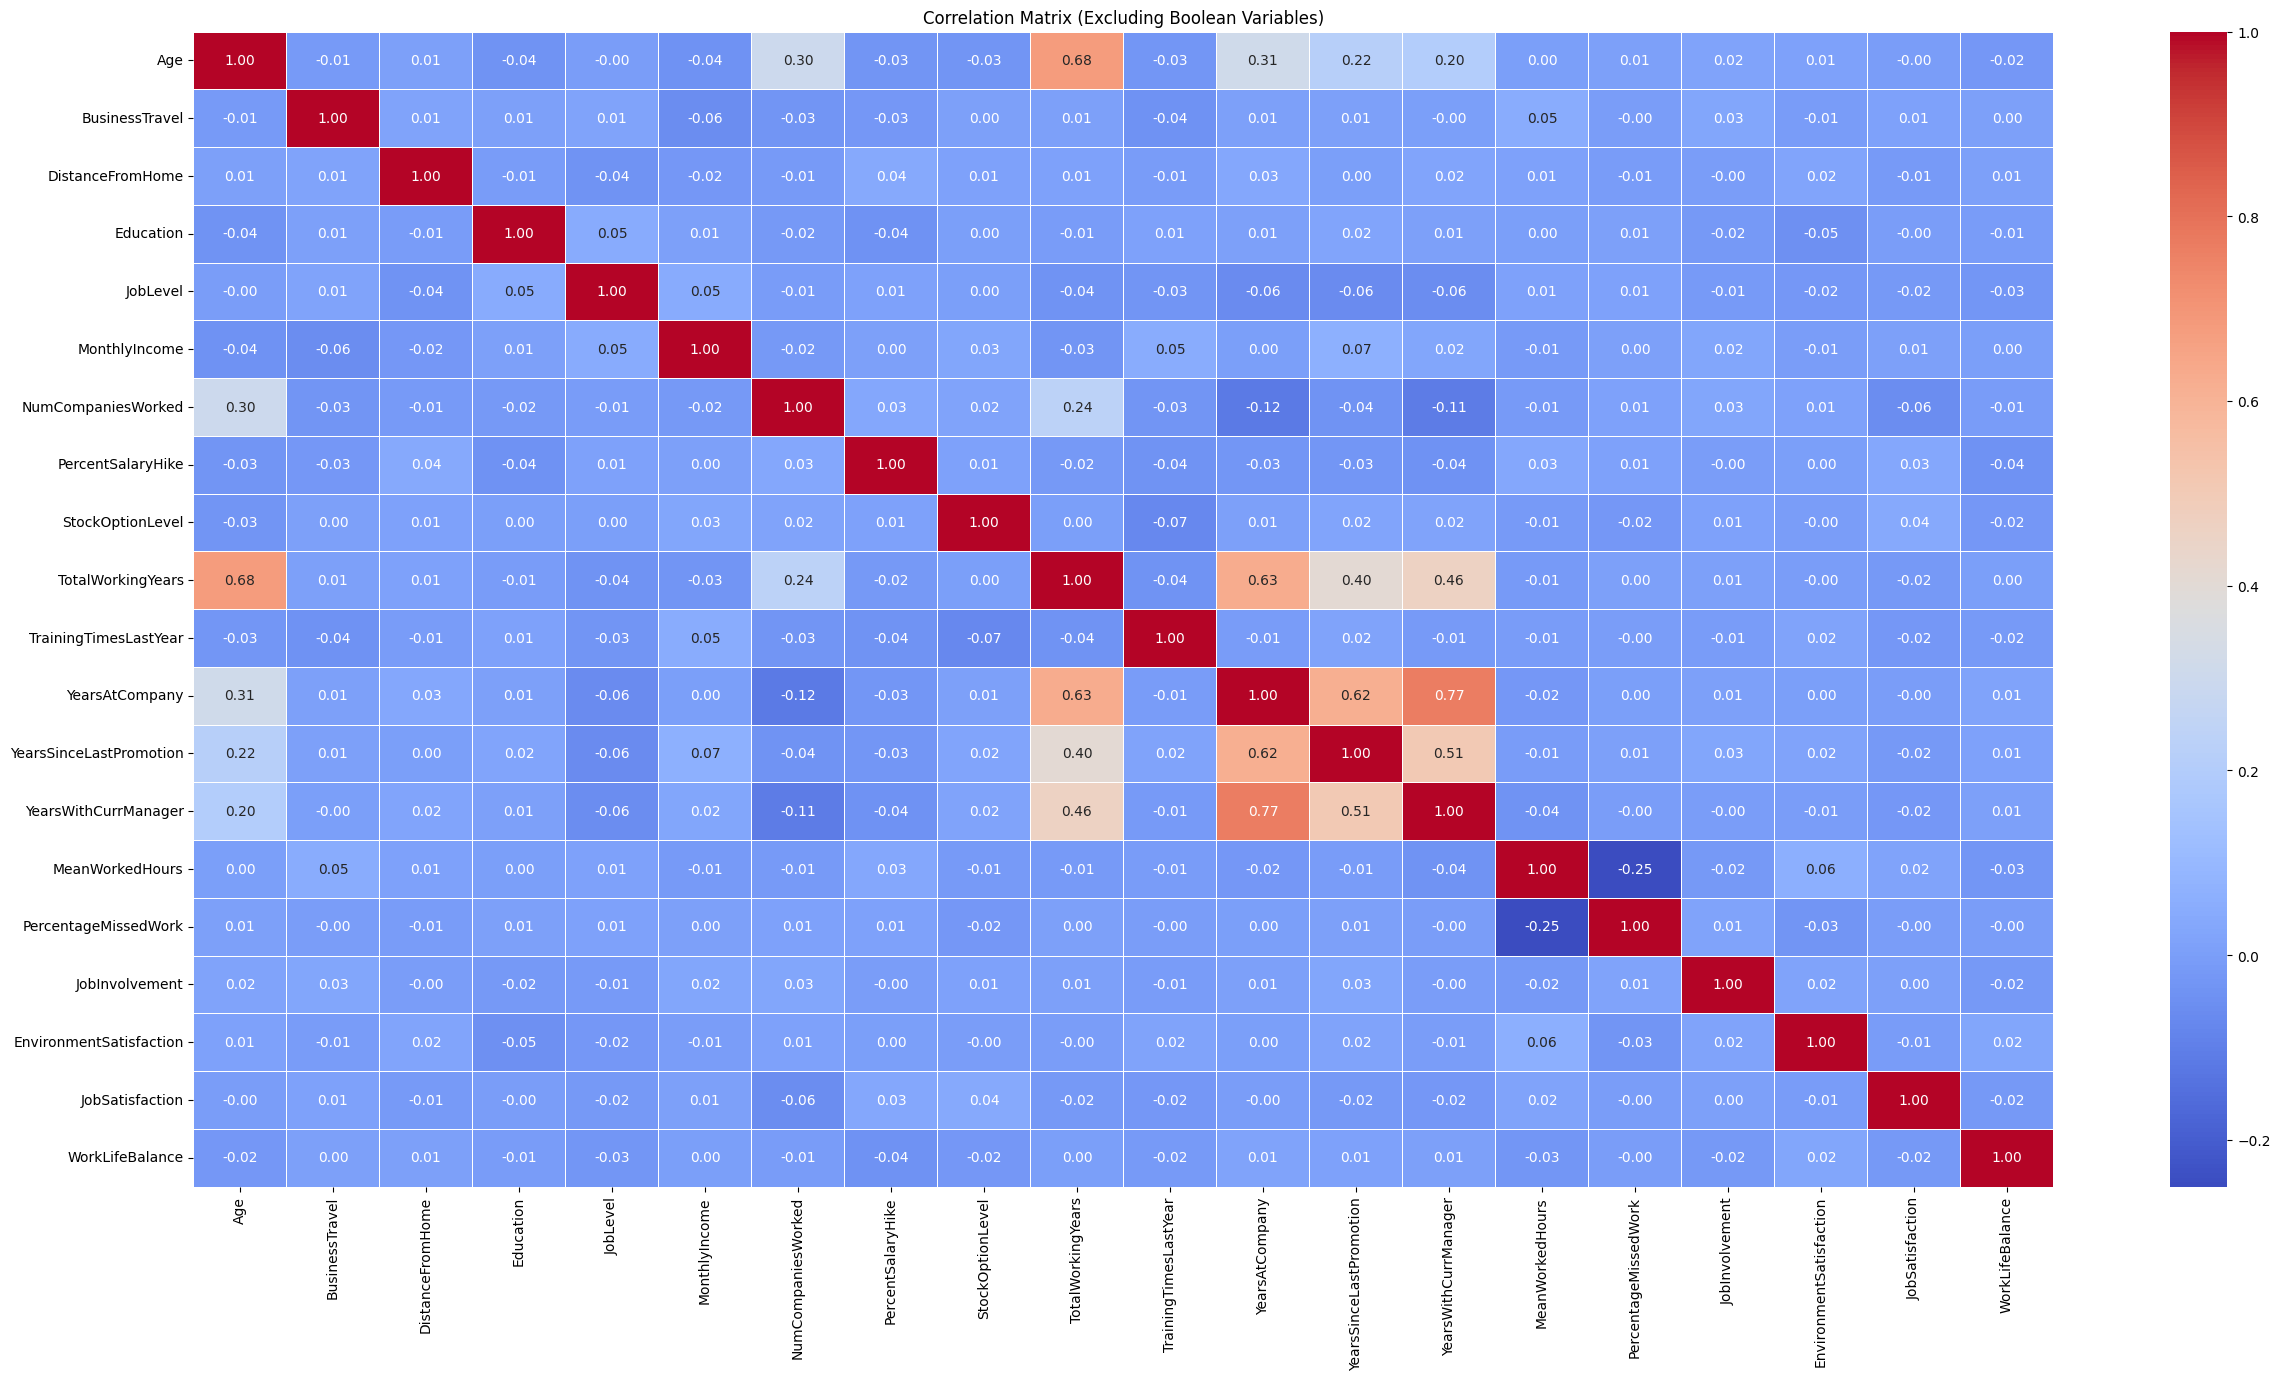

In [84]:
# Select numerical columns
numeric_cols = numeric_data_no_attrition.select_dtypes(include=['number'])

# Exclude boolean-like columns (0/1)
filtered_numeric_cols = numeric_cols.loc[:, (numeric_cols.nunique() > 2)]

# Compute correlation matrix
corr_matrix = filtered_numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Matrix (Excluding Boolean Variables)")
plt.show()
